# TensorFlow 简明教程

## 1. TF简介

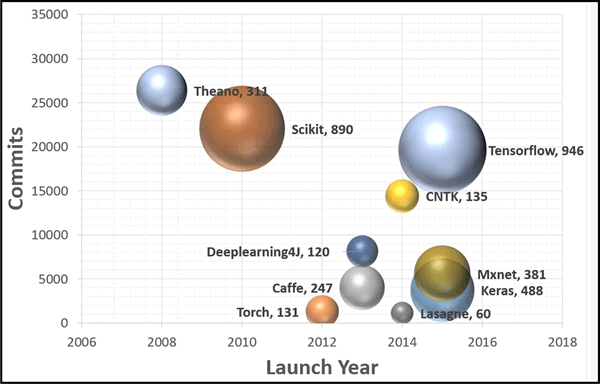

TensorFlow 则还有更多的特点，如下：
支持所有流行语言，如 Python、C++、Java、R和Go。
可以在多种平台上工作，甚至是移动平台和分布式平台。
它受到所有云服务（AWS、Google和Azure）的支持。
Keras——高级神经网络 API，已经与 TensorFlow 整合。
与 Torch/Theano 比较，TensorFlow 拥有更好的计算图表可视化。
允许模型部署到工业生产中，并且容易使用。
有非常好的社区支持。
TensorFlow 不仅仅是一个软件库，它是一套包括 TensorFlow，TensorBoard 和 TensorServing 的软件。

## 2. TF安装（华为云用户无需安装）
如需本地离线使用，需要安装anaconda软件，然后安装tf 1.13.1即可（详情百度）

## 3. 第一个TF程序

In [ ]:
import tensorflow as tf
message = tf.constant('welcome to the exciting world of Deeop Neural Networks!')
with tf.Session() as sess:
    print(sess.run(message).decode())

## 4. TensorFlow 常量 变量 占位符
- tf中数据类型都是张量(tensor）

### 4.1 常量
- 标量常量

In [ ]:
t_1 = tf.constant(4)
t_2 = tf.constant([4,3,2])

t_3 = tf.zeros([3,2],dtype=tf.int32)

t_4 = tf.zeros_like(t_1)# 同理  tf.ones()

with tf.Session() as sess:
    print(t_1)
    print(sess.run(t_1))
    print(sess.run(t_2))
    print(sess.run(t_3))
    print(sess.run(t_4))

- 随机正态分布常量

In [ ]:
t_random = tf.random_normal([30,1],mean=0,stddev=1)#seed make the random output keep unchange
sess = tf.Session()
sess.run(t_random)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(sess.run(t_random))
plt.show()

- 截尾正态分布随机常量

In [ ]:
t_random2 = tf.truncated_normal([100,1], stddev=1,seed=12)
#print(sess.run(t_random2))
plt.plot(sess.run(t_random2))
plt.show()

### 4.2变量

- 变量初始化（用常量）

In [ ]:
rand_t = tf.random_uniform([10,10],0,10,seed=0)   #返回10x10的矩阵，最小是0，最大是10
t_a = tf.Variable(rand_t)
init = tf.global_variables_initializer()
sess.run(init)     #这一句才是真正的初始化
print(sess.run(t_a))

### 4.3计算图

In [ ]:
x = tf.placeholder(dtype=tf.float32,name='flat')  #定义数据类型
y = 2 * x
data = tf.random_uniform([4,5],10,seed=12)   #最大是10
x_data = sess.run(data)
print(x_data)
print(sess.run(y,feed_dict = {x:x_data}))    #需要填入placehold的值

### 4.4 程序结构
- 一种开启会话方式

In [ ]:
import tensorflow as tf

In [ ]:
t_1 = tf.constant([1,2,3])
t_2 = tf.constant([3,3,5])
out = tf.add(t_1,t_2)

#方式1 比较常见
with tf.Session() as sess:
    print(t_1)
    print(sess.run(t_2))
    print(out)
    print(sess.run(out))



In [ ]:

#方式2 比较常见
sess = tf.Session()
print(sess.run(out))
sess.close()

In [ ]:
#方式3 不多
sess = tf.Session()
print(out.eval(session=sess))
sess.close()

In [ ]:


#方式4  调试常用
sess = tf.InteractiveSession()
print(out.eval())
sess.close()

#在我们使用tf.InteractiveSession()来构建会话的时候，我们可以先构建一个session然后再定义操作（operation），
#如果我们使用tf.Session()来构建会话我们需要在会话构建之前定义好全部的操作（operation）然后再构建会话。